<a href="https://colab.research.google.com/github/Nish-hub94/ML-for-Computer-vision/blob/main/Exercise%206/exe_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

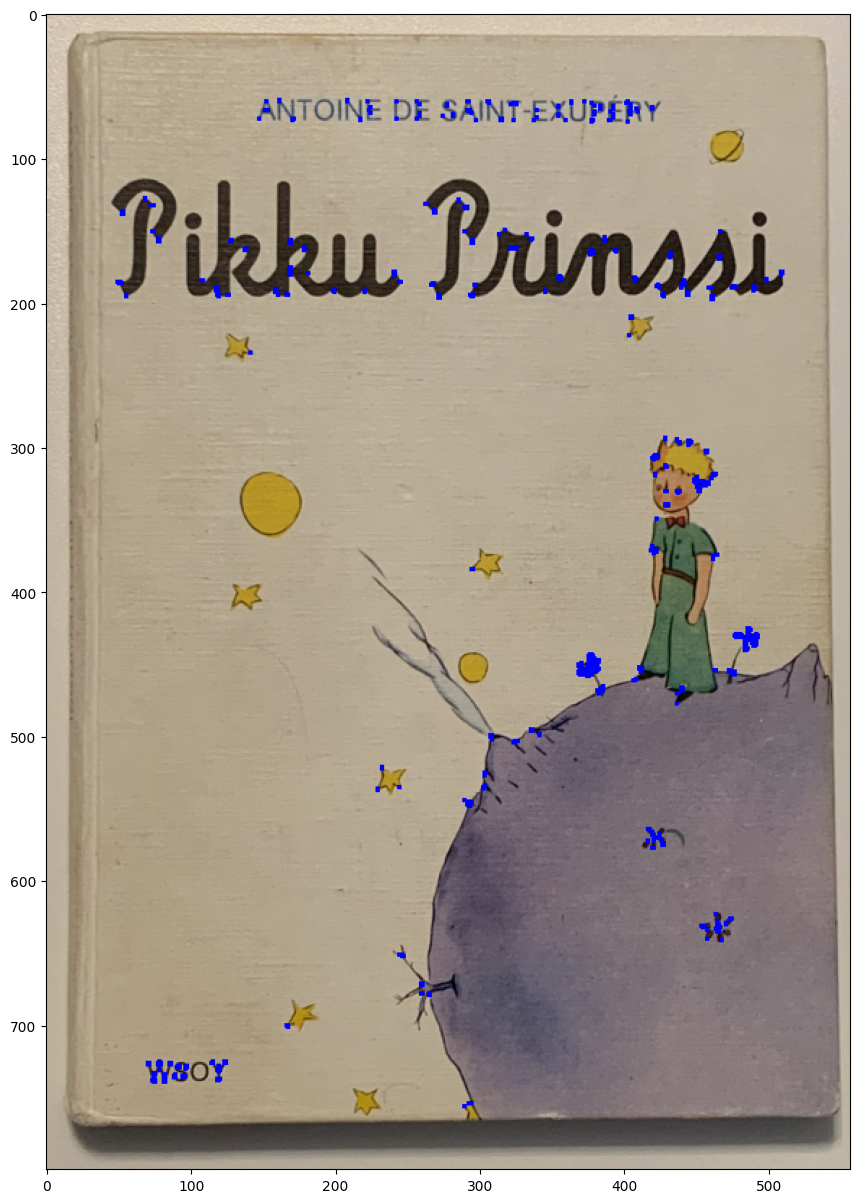

(<matplotlib.image.AxesImage at 0x78c86c2025d0>, None)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/ref1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)

# param1: blockSize - It is the size of neighbourhood considered for corner detection
# param2: ksize - Aperture parameter of the Sobel derivative used.
# param3: k - Harris detector free parameter in the equation.
corners = cv.cornerHarris(gray, 3, 3, 0.1)

#visualization of corner detection
vis_corners = cv.dilate(corners, None)
img[vis_corners>0.1 * vis_corners.max()]=[0,0,255]

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img),plt.show()

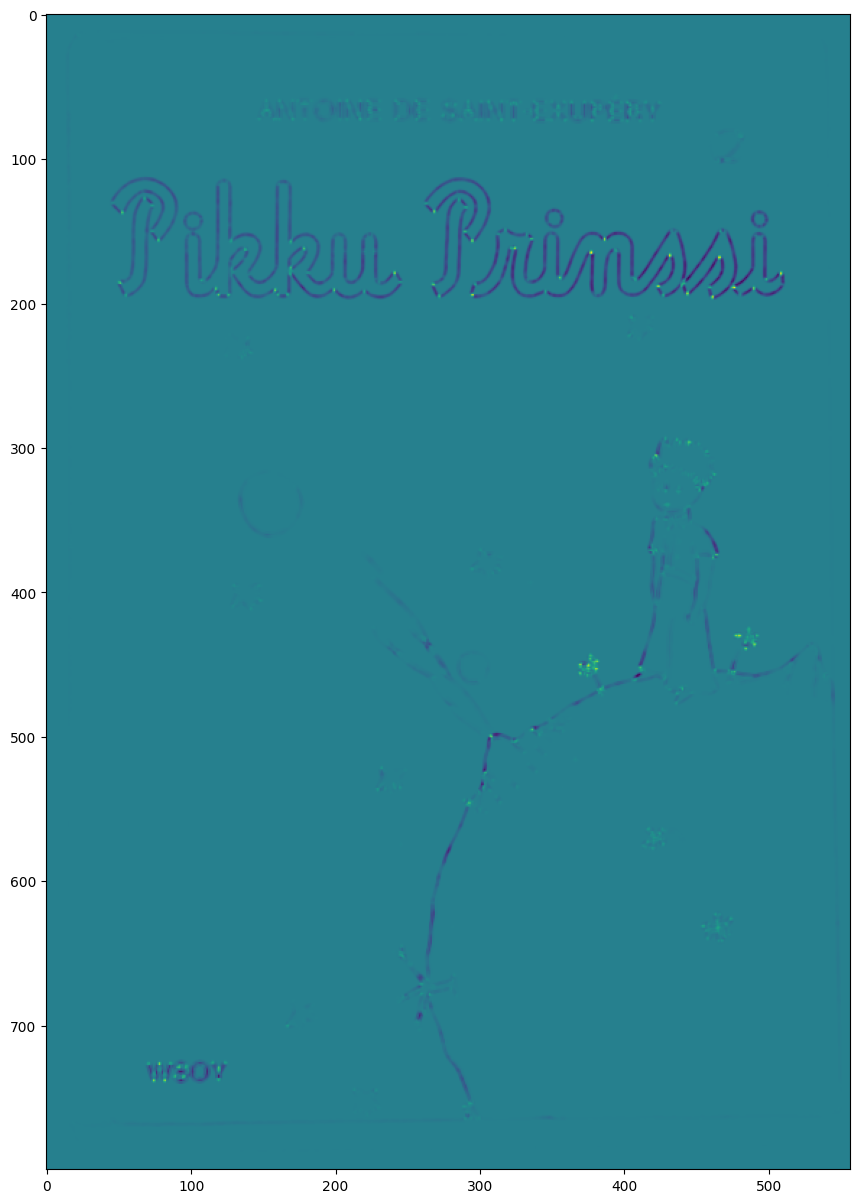

(<matplotlib.image.AxesImage at 0x78c844f318b0>, None)

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/ref1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)

# param1: blockSize - It is the size of neighbourhood considered for corner detection
# param2: ksize - Aperture parameter of the Sobel derivative used.
# param3: k - Harris detector free parameter in the equation.
corners = cv.cornerHarris(gray, 3, 3, 0.1)

#visualization of corner detection
vis_corners = cv.dilate(corners, None)
img[vis_corners>0.1 * vis_corners.max()]=[0,0,255]

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(corners),plt.show()





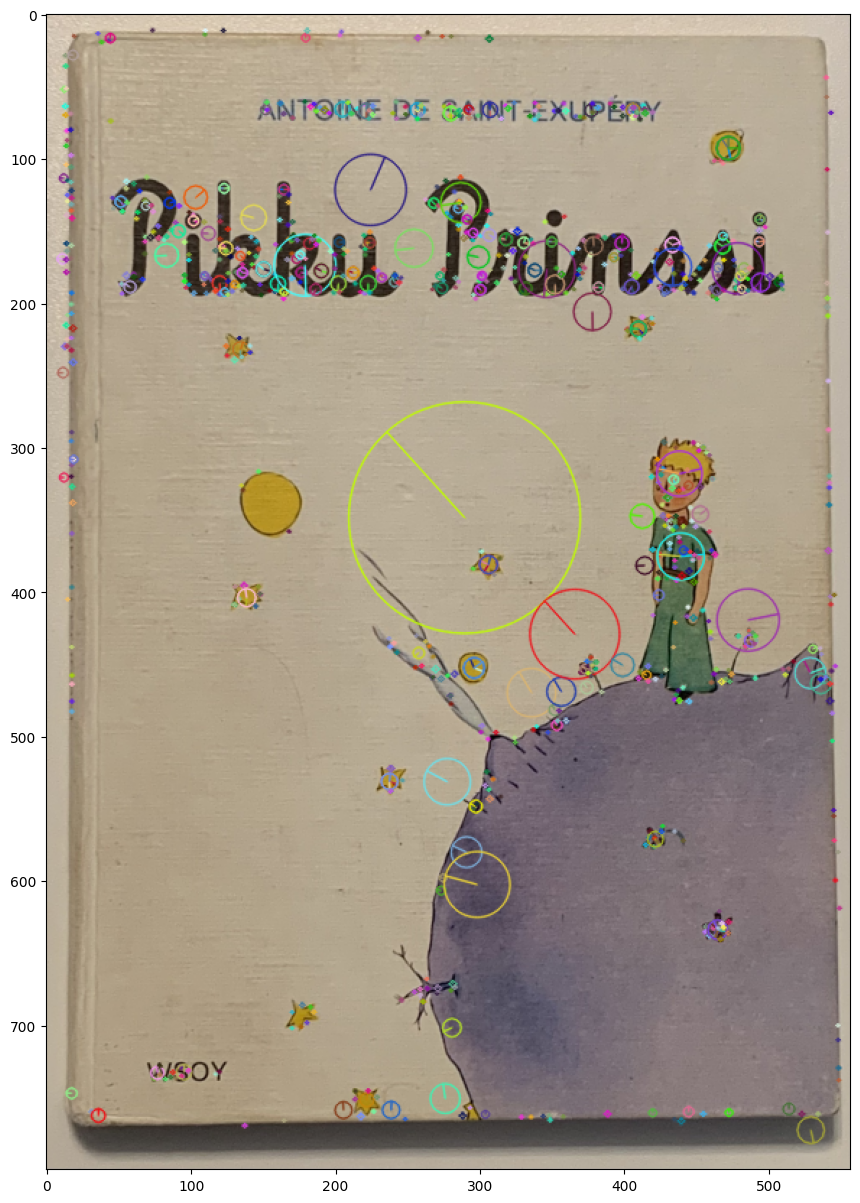

(<matplotlib.image.AxesImage at 0x78c83789fad0>, None)

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create()
kp1 = sift.detect(img1, None)

kp1_img = cv.drawKeypoints(img1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig,ax = plt.subplots(figsize =(15,15))
ax.imshow(kp1_img),plt.show()

(1074, 128)


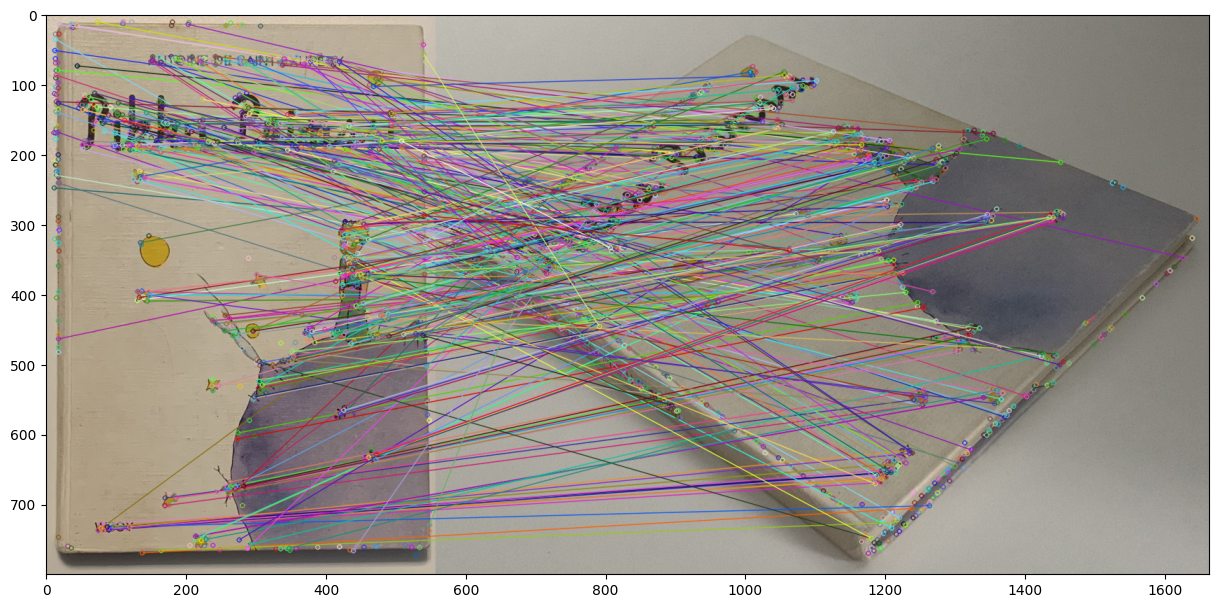

(<matplotlib.image.AxesImage at 0x78c827ff7710>, None)

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('/content/rot1.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

sift =cv.SIFT_create()
kp1, des1 =sift.detectAndCompute(img1, None)
kp2, des2 =sift.detectAndCompute(img2, None)
print(des1.shape)

bf =cv.BFMatcher(cv.NORM_L2, crossCheck =True)
matches = bf.match(des1, des2)
match_img =cv.drawMatches(img1, kp1, img2, kp2, matches, None)

fig, ax =plt.subplots(figsize=(15,15))
ax.imshow(match_img), plt.show()





(1074, 128)


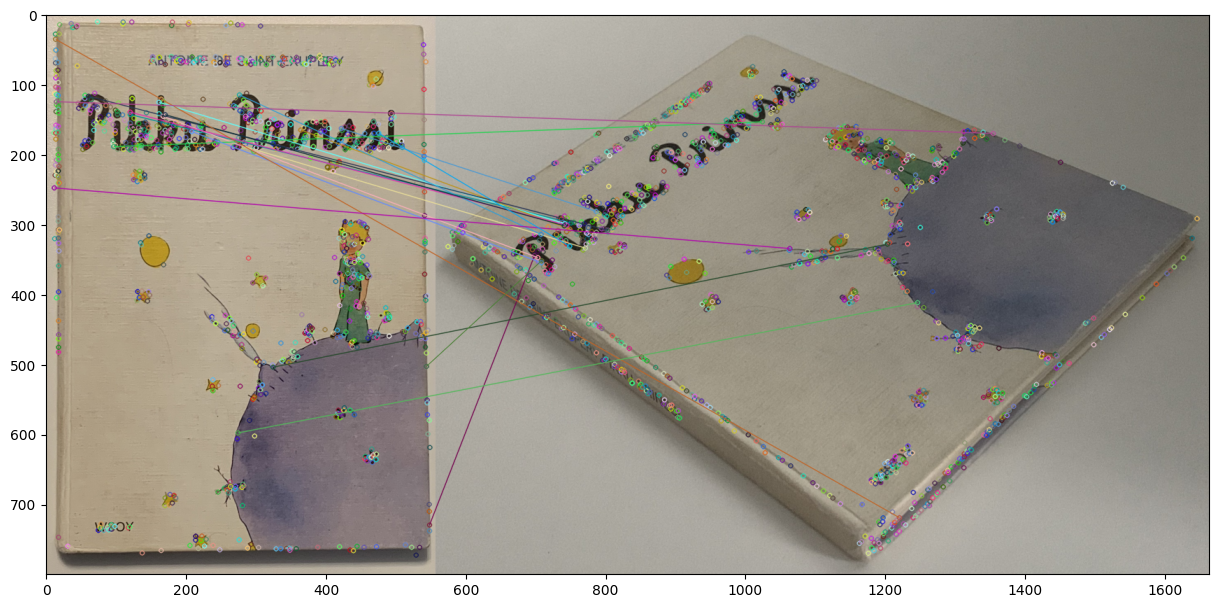

(<matplotlib.image.AxesImage at 0x78c827be5be0>, None)

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('/content/rot1.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

sift =cv.SIFT_create()
kp1, des1 =sift.detectAndCompute(img1, None)
kp2, des2 =sift.detectAndCompute(img2, None)
print(des1.shape)

bf =cv.BFMatcher(cv.NORM_L2, crossCheck =True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
match_img =cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None)

fig, ax =plt.subplots(figsize=(15,15))
ax.imshow(match_img), plt.show()


(1074, 128)


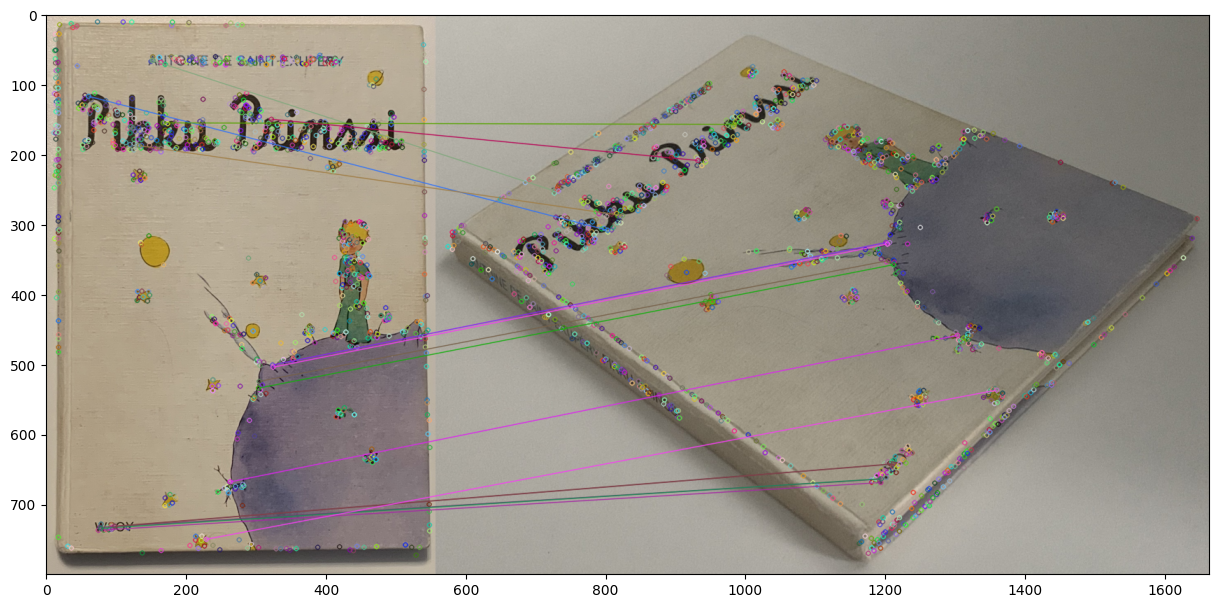

(<matplotlib.image.AxesImage at 0x78c8270a48c0>, None)

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/ref1.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('/content/rot1.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

sift =cv.SIFT_create()
kp1, des1 =sift.detectAndCompute(img1, None)
kp2, des2 =sift.detectAndCompute(img2, None)
print(des1.shape)

#bf =cv.BFMatcher(cv.NORM_L2, crossCheck =True)
#matches = bf.match(des1, des2)
#match_img =cv.drawMatches(img1, kp1, img2, kp2, matches, None)

bf =cv.BFMatcher(cv.NORM_L2, crossCheck =False)
matches = bf.knnMatch(des1, des2, k=2)
good_matches =[]
for m, n in matches:
  if m.distance < 0.5 *n.distance:
    good_matches.append(m)


match_img =cv.drawMatches(img1, kp1, img2, kp2, good_matches, None)

fig, ax =plt.subplots(figsize=(15,15))
ax.imshow(match_img), plt.show()
